Using BEAST plotting functions and Pandas to analyze BEAST output
==========

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from beast.plotting.plot_stats_check import make_diagnostic_plots

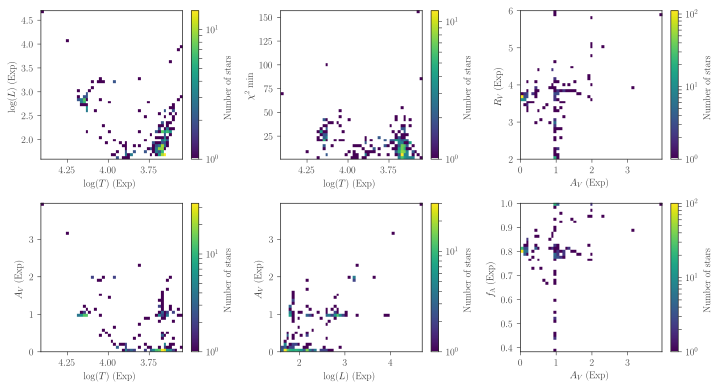

In [2]:
results_file = 'beast_example_phat/beast_example_phat_stats.fits'
fig = make_diagnostic_plots(results_file)

We can also use the function ``plot_generic`` that is the basis for ``make_diagnostic_plots`` to make more customized plots of the output. Here we make an HR diagram scatterplot with points colormapped by $\chi^2$ fit, and add circles around the points with $\chi^2 > 50$.

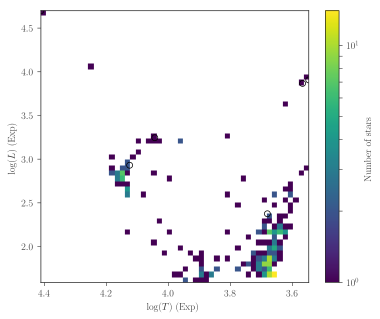

In [8]:
from beast.plotting.beastplotlib import plot_generic

from astropy.table import Table
from matplotlib.colors import LogNorm

t = Table.read(results_file) # read FITS table with astropy
fig, ax, cbar = plot_generic(t, 'logT_Exp', 'logL_Exp', #plottype='scatter', 
                             plot_kwargs={#'c'    : t['chi2min'],
                                          'norm' : LogNorm() }
                            )
fig.set_size_inches(6,5)

plot_generic(t, 'logT_Exp', 'logL_Exp', plottype='scatter', fig=fig, ax=ax, 
             thresh_col='chi2min', thresh=50, thresh_op='greater', 
             plot_kwargs={'facecolor' : 'none',
                          'edgecolor' : 'k' })

Another very useful diagnostic tool is ``scatter_matrix`` from the Pandas plotting library. This function, given a Pandas dataframe object, plots each column against each other, with a histogram or kernel density estimate for the diagonal. Here we use it to plot all estimates of luminosity (expectation value, best value, and 16th, 50th, and 84th percentiles) against each other.

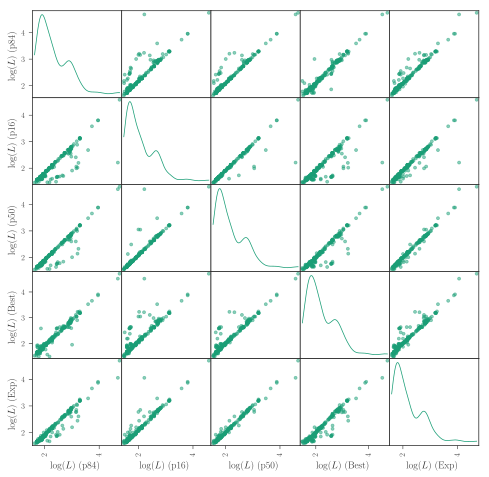

In [4]:
from pandas.tools.plotting import scatter_matrix
from beast.plotting.beastplotlib import fancify_colname

df = t.to_pandas() # convert table to Pandas dataframe

df_logL = df.filter(regex='logL') # select only columns with logL in name

sm = scatter_matrix(df_logL, diagonal='kde', figsize=(8,8))

# use beastplotlib function to convert axis labels to Texified format
for ax in sm.ravel():
    xlabel = fancify_colname(ax.get_xlabel())
    ax.set_xlabel(xlabel)
    ylabel = fancify_colname(ax.get_ylabel())
    ax.set_ylabel(ylabel)

We can also go full Rorschach and plot expectation values of luminosity, temperature, initial mass, and log g against each other.

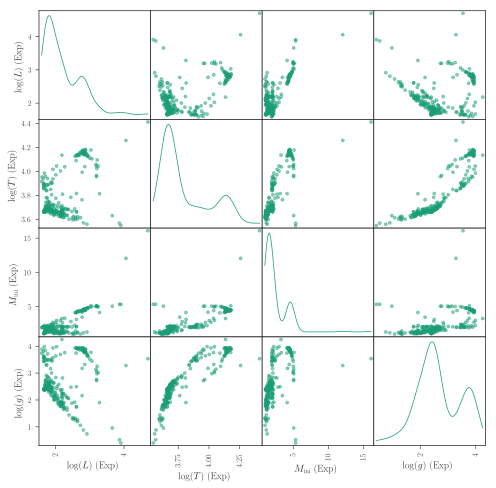

In [5]:
sm = scatter_matrix(df[['logL_Exp','logT_Exp','M_ini_Exp','logg_Exp']], diagonal='kde', figsize=(8,8))
for ax in sm.ravel():
    xlabel = fancify_colname(ax.get_xlabel())
    ax.set_xlabel(xlabel)
    ylabel = fancify_colname(ax.get_ylabel())
    ax.set_ylabel(ylabel)